In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train, X_test = X_train.reshape(-1, 28,28,1), X_test.reshape(-1, 28,28,1)

#Adam

In [4]:
model_1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [5]:
model_1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [6]:
h1 = model_1.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 41s 7ms/step - loss: 0.2833 - accuracy: 0.9246 - val_loss: 0.1051 - val_accuracy: 0.9702
Epoch 2/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.0890 - accuracy: 0.9727 - val_loss: 0.0748 - val_accuracy: 0.9773
Epoch 3/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.0627 - val_accuracy: 0.9831
Epoch 4/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0622 - val_accuracy: 0.9820
Epoch 5/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0763 - val_accuracy: 0.9808


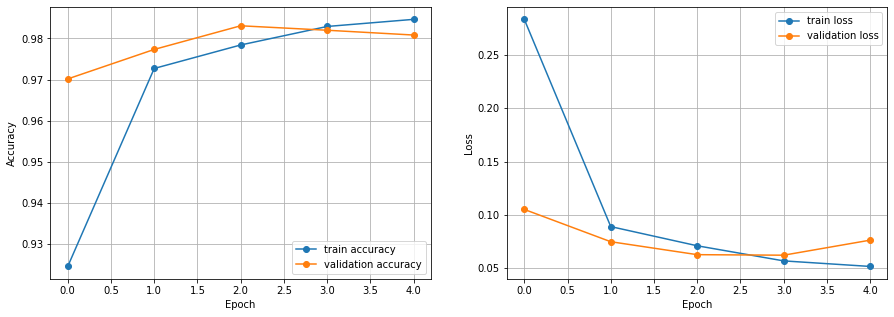

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [8]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9825

Test Loss: 0.07182183116674423

Test Accuracy: 0.9825000166893005


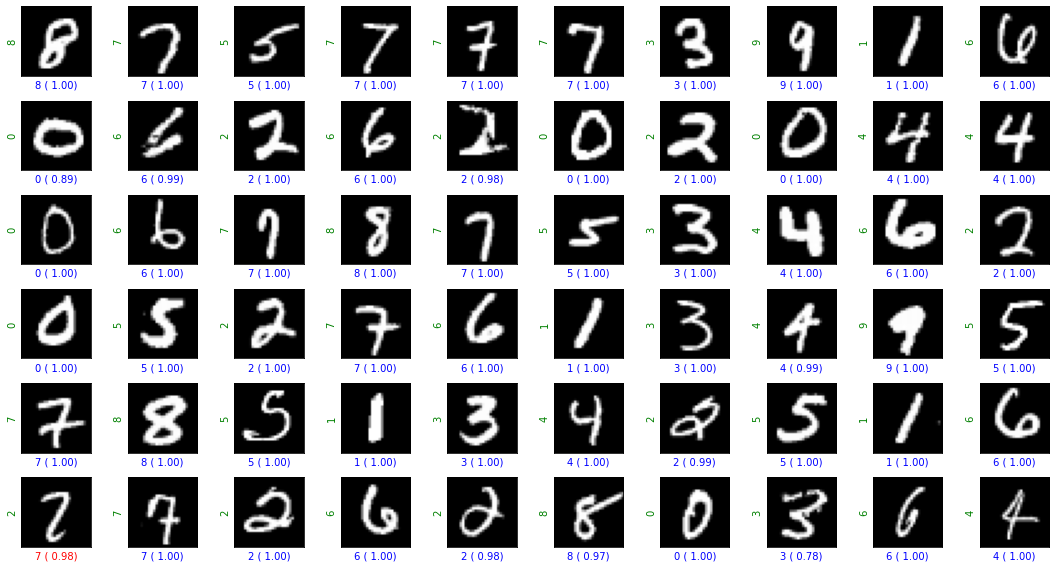

In [9]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_1.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#SGD

In [10]:
model_2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [11]:
model_2.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h2 = model_2.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 11s 6ms/step - loss: 1.1834 - accuracy: 0.7427 - val_loss: 0.4064 - val_accuracy: 0.8731
Epoch 2/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.2927 - accuracy: 0.9103 - val_loss: 0.3090 - val_accuracy: 0.9101
Epoch 3/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.1835 - accuracy: 0.9442 - val_loss: 0.1660 - val_accuracy: 0.9503
Epoch 4/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.1265 - accuracy: 0.9602 - val_loss: 0.1100 - val_accuracy: 0.9665
Epoch 5/5
1715/1715 [==============================] - 11s 6ms/step - loss: 0.1050 - accuracy: 0.9668 - val_loss: 0.1744 - val_accuracy: 0.9534


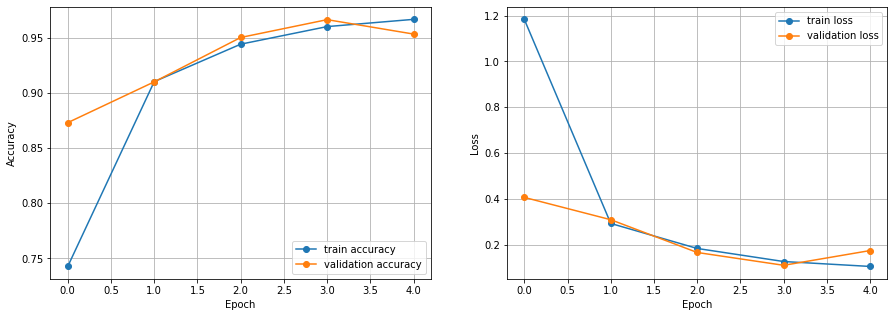

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1590 - accuracy: 0.9537

Test Loss: 0.15898685157299042

Test Accuracy: 0.9537000060081482


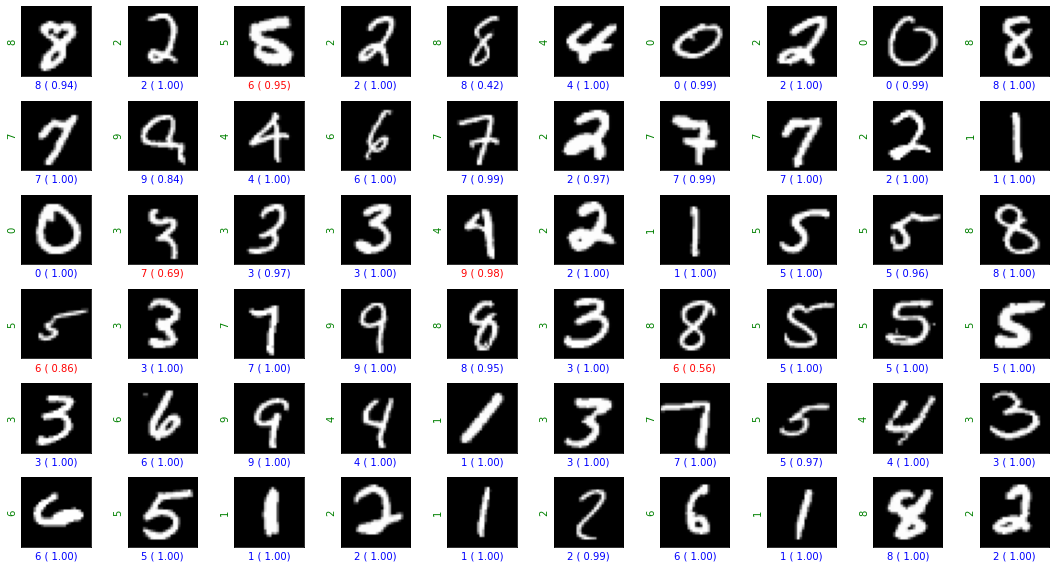

In [15]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_2.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

#RMSProp

In [16]:
model_3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [17]:
model_3.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
h3 = model_3.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 13s 7ms/step - loss: 0.3869 - accuracy: 0.9215 - val_loss: 0.0828 - val_accuracy: 0.9784
Epoch 2/5
1715/1715 [==============================] - 12s 7ms/step - loss: 0.1112 - accuracy: 0.9714 - val_loss: 0.1188 - val_accuracy: 0.9739
Epoch 3/5
1715/1715 [==============================] - 12s 7ms/step - loss: 0.1006 - accuracy: 0.9763 - val_loss: 0.1054 - val_accuracy: 0.9753
Epoch 4/5
1715/1715 [==============================] - 12s 7ms/step - loss: 0.1035 - accuracy: 0.9783 - val_loss: 0.0897 - val_accuracy: 0.9808
Epoch 5/5
1715/1715 [==============================] - 12s 7ms/step - loss: 0.1051 - accuracy: 0.9773 - val_loss: 0.2521 - val_accuracy: 0.9668


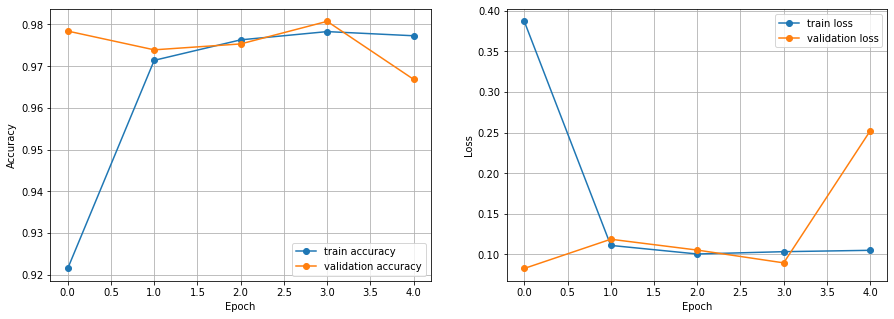

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.9706

Test Loss: 0.22732196748256683

Test Accuracy: 0.9706000089645386


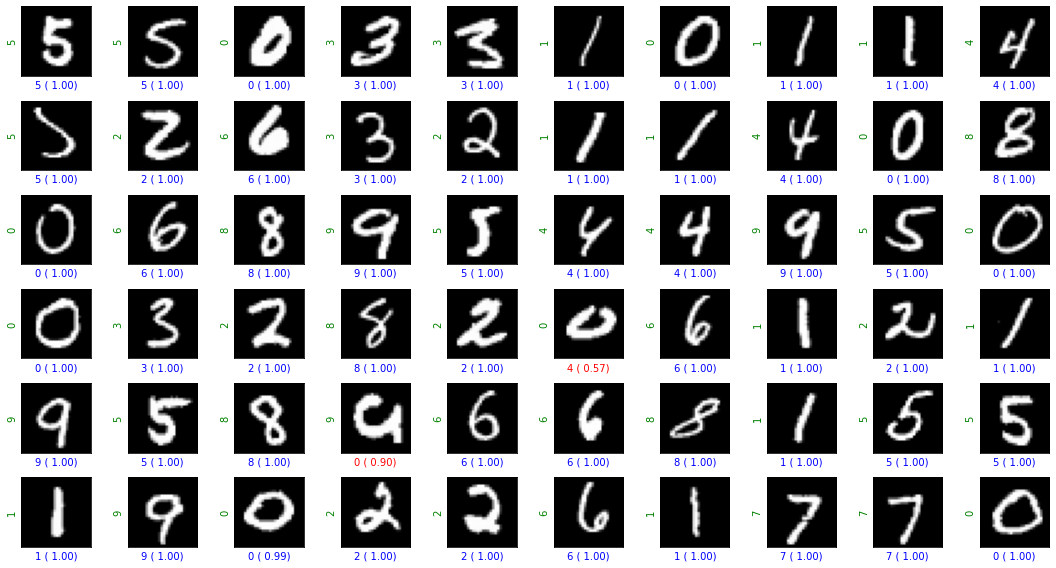

In [21]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_3.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()